# Objetivo

¿Qué factores están asociados a la presencia de diabetes en pacientes?"

# Consideraciones importantes

## ¿Qué factores están asociados a la presencia de diabetes en pacientes?

Este dataset suele contener variables como: edad, nivel de glucosa, presión arterial, índice de masa corporal (IMC), etc., junto con una variable objetivo (Outcome) que indica si el paciente tiene diabetes (1) o no (0).


In [1]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Cargar dataset
df = pd.read_csv('./diabetes.csv')

In [4]:
# Compruebo 
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [15]:
# Analizo valores faltantes o atípicos (ceros en columnas que no deberían tener)
print("Valores cero por columna:\n", (df == 0).sum())

Valores cero por columna:
 Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [13]:
#limpiar df de valores irreales
df = df[(df['BMI'] >= 10) & (df['Glucose'] >= 25) & (df['BloodPressure'] > 0)]

#mapear 0 como Negativo y 1 como Positivo
df['Outcome'] = df['Outcome'].map({0: 'Negativo', 1: 'Positivo'})



In [14]:
# Dimensiones y tipos de datos
print("\nDimensiones de los datos\n")
print(df.shape, "\n")

print("---------------------------------------------------------")

print("\nInfo de los datos\n")
print(df.info())


Dimensiones de los datos

(724, 9) 

---------------------------------------------------------

Info de los datos

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   0 non-null      object 
dtypes: float64(2), int64(6), object(1)
memory usage: 56.6+ KB
None


# Visualizaciones de los datos

A partir de acá aplicaremos distintos modelos para ir visualizando los datos y realizar el análisis correspondiente

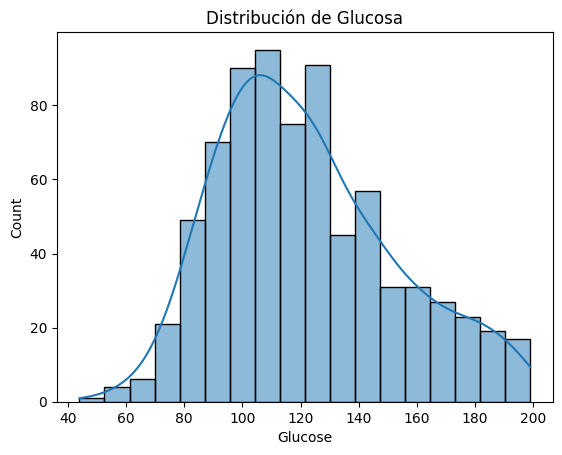

In [8]:
# Histograma: glucosa
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribución de Glucosa')
plt.show()

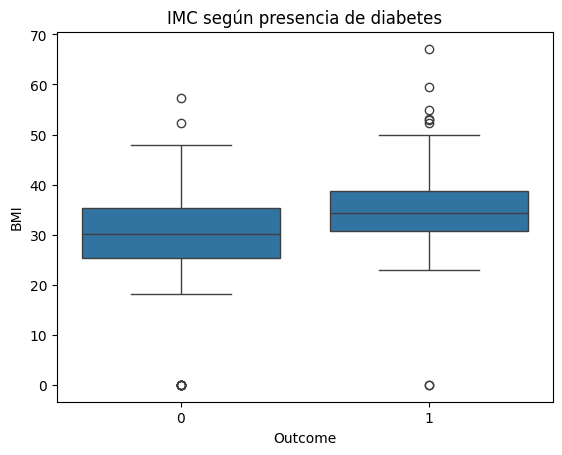

In [14]:
# Boxplot: IMC según Outcome
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('IMC según presencia de diabetes')
plt.show()

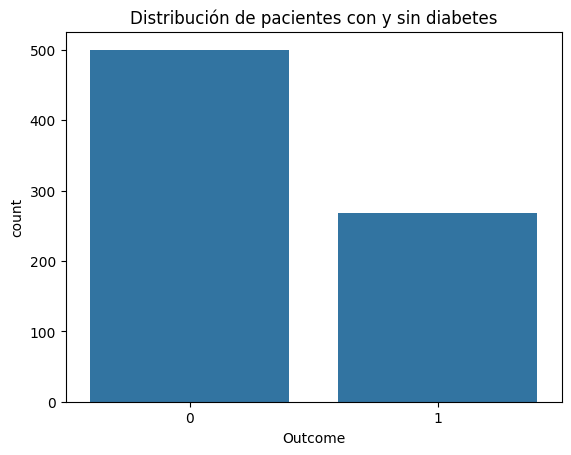

In [15]:
# Barras: conteo de Outcome
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de pacientes con y sin diabetes')
plt.show()

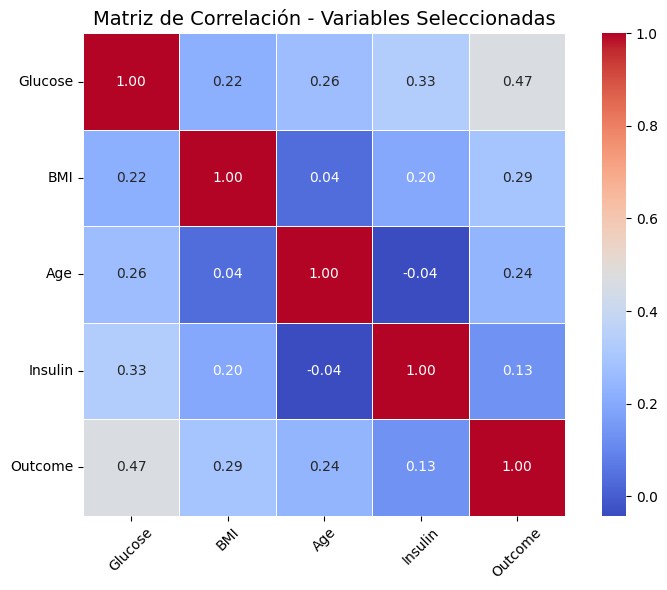

In [ ]:
# Matriz de correlación entre todas las variables numéricas

# Variables de interés
variables = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
df_vars = df[variables]

# Calcular correlación
corr_matrix = df_vars.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Variables Seleccionadas', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

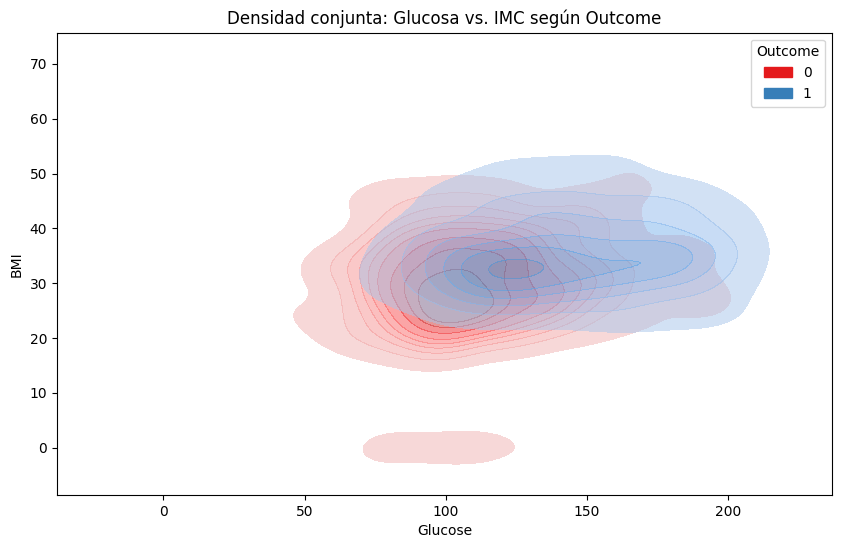

In [22]:
# # Pairplot: relación entre variables clave
# sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome')
# plt.suptitle('Relaciones entre variables', y=1.02)
# plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, x='Glucose', y='BMI', hue='Outcome',
    fill=True, alpha=0.5, palette='Set1', thresh=0.05
)
plt.title('Densidad conjunta: Glucosa vs. IMC según Outcome')
plt.show()

# Visualizaciones



In [33]:
df = df.replace({pd.NA: np.nan})

/tmp/ipykernel_59753/3442942702.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({pd.NA: np.nan})


In [34]:
# Imputar con la media
df = df.fillna(df.mean(numeric_only=True))


print(df.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [35]:
from sklearn.preprocessing import StandardScaler

features = df.columns.drop('Outcome')
scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

In [37]:
# 5. Conclusiones parciales
print("Conclusiones:")
print("- Se encontraron ceros en variables clínicas, fueron tratados como valores faltantes.")
print("- Se imputaron con la media y se escalaron las variables.")
print("- Glucosa, edad y BMI mostraron alta relación con la presencia de diabetes.")

Conclusiones:
- Se encontraron ceros en variables clínicas, fueron tratados como valores faltantes.
- Se imputaron con la media y se escalaron las variables.
- Glucosa, edad y BMI mostraron alta relación con la presencia de diabetes.
